# The Lorenz Differential Equations

Before we start, we import some preliminary libraries.

In [1]:
%pip install -q ipywidgets


[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

from ipywidgets import interactive, fixed

We will also define the actual solver and plotting routine.

In [3]:
def solve_lorenz(sigma=10.0, beta=8./3, rho=28.0):
    """Plot a solution to the Lorenz differential equations."""

    max_time = 4.0
    N = 30

    fig = plt.figure(1)
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)
    angle = 104
    ax.view_init(30, angle)
    plt.show()

    return t, x_t

We explore the Lorenz system of differential equations:

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$

Let's change (\\(\sigma\\), \\(\beta\\), \\(\rho\\)) with ipywidgets and examine the trajectories.

In [4]:
w=interactive(solve_lorenz,sigma=(0.0,50.0),rho=(0.0,50.0))
w

interactive(children=(FloatSlider(value=10.0, description='sigma', max=50.0), FloatSlider(value=2.666666666666…

For the default set of parameters, we see the trajectories swirling around two points, called attractors. 

The object returned by `interactive` is a `Widget` object and it has attributes that contain the current result and arguments:

In [5]:
t, x_t = w.result

In [6]:
w.kwargs

{'sigma': 10.0, 'beta': 2.6666666666666665, 'rho': 28.0}

After interacting with the system, we can take the result and perform further computations. In this case, we compute the average positions in \\(x\\), \\(y\\) and \\(z\\).

In [7]:
xyz_avg = x_t.mean(axis=1)

In [8]:
xyz_avg.shape

(30, 3)

Creating histograms of the average positions (across different trajectories) show that, on average, the trajectories swirl about the attractors.

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

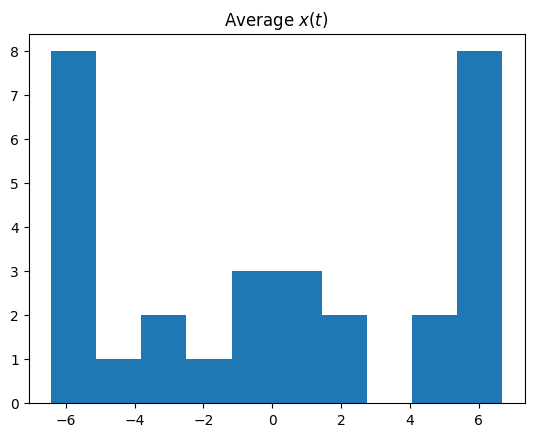

In [10]:
plt.hist(xyz_avg[:,0])
plt.title('Average $x(t)$');

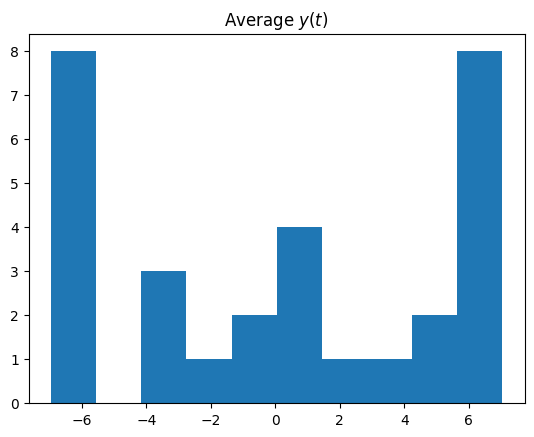

In [11]:
plt.hist(xyz_avg[:,1])
plt.title('Average $y(t)$');